In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import sys
import joblib
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sys.modules['sklearn.externals.joblib'] = joblib

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Major Project/Exoplanets/Data/Feature_Engineered_Data.csv")

In [ ]:
df

,Disposition Score,Not Transit-Like FPF,Stellar Eclipse FPF,Centroid Offset FPF,Ephemeris Contamination FPF,Orbital Period,Transit Epoch,Impact Parameter,mpact Parameter Upper,Impact Parameter Lower,...,Stellar Effective Temperature Lower,Stellar Surface Gravity,Stellar Surface Gravity Upper,Stellar Radius,Stellar Radius Upper,Stellar Radius Lower,RA,Dec,Kepler-band,Disposition Using Kepler Data
0,1.000,0,0,0,0,9.488036,170.538750,0.146,0.318,-0.146,...,-81.0,4.467,0.064,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,0.969,0,0,0,0,54.418383,162.513840,0.586,0.059,-0.443,...,-81.0,4.467,0.064,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
2,0.000,0,0,0,0,19.899140,175.850252,0.969,5.126,-0.077,...,-176.0,4.544,0.044,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
3,0.000,0,1,0,0,1.736952,170.307565,1.276,0.115,-0.092,...,-174.0,4.564,0.053,0.791,0.201,-0.067,285.53461,48.285210,15.597,1
4,1.000,0,0,0,0,2.525592,171.595550,0.701,0.235,-0.478,...,-211.0,4.438,0.070,1.046,0.334,-0.133,288.75488,48.226200,15.509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,1,1,0,0.527699,131.705093,1.252,0.051,-0.049,...,-166.0,4.529,0.035,0.903,0.237,-0.079,297.18875,47.093819,14.082,1
9560,0.497,0,0,0,0,1.739849,133.001270,0.043,0.423,-0.043,...,-220.0,4.444,0.056,1.031,0.341,-0.114,286.50937,47.163219,14.757,0
9561,0.021,0,0,1,0,0.681402,132.181750,0.147,0.309,-0.147,...,-236.0,4.447,0.056,1.041,0.341,-0.114,294.16489,47.176281,15.385,1
9562,0.092,0,0,0,0,333.486169,153.615010,0.214,0.255,-0.214,...,-128.0,2.992,0.030,7.824,0.223,-1.896,296.76288,47.145142,10.998,0


In [4]:
X = df.iloc[: ,:-1].values
y = df.iloc[: ,-1].values

In [5]:
print(X.shape)
print(y.shape)

(9564, 35)
(9564,)


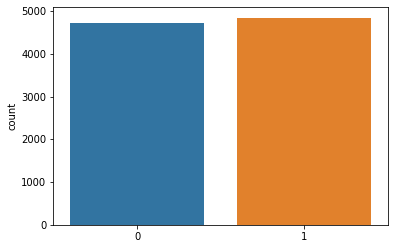

In [6]:
sns.countplot(y)

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
ffs = SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=1)


In [8]:
ffs.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features='best')

In [9]:
features = list(ffs.k_feature_names_)
features = list(map(int, features))

In [10]:
features

[0, 1, 2, 3, 4, 12, 16, 19, 22]

In [11]:
selectedColumns = []
for index in features:
    selectedColumns.append(list(df.columns)[index])
selectedColumns.append('Disposition Using Kepler Data')
df = df[selectedColumns]

In [12]:
df

,Disposition Score,Not Transit-Like FPF,Stellar Eclipse FPF,Centroid Offset FPF,Ephemeris Contamination FPF,Transit Depth,Planetary Radius Upper,Insolation Flux,TCE Planet Number,Disposition Using Kepler Data
0,1.000,0,0,0,0,616.0,0.26,93.59,1.0,0
1,0.969,0,0,0,0,875.0,0.32,9.11,2.0,0
2,0.000,0,0,0,0,10800.0,3.92,39.30,1.0,0
3,0.000,0,1,0,0,8080.0,8.50,891.96,1.0,1
4,1.000,0,0,0,0,603.0,0.88,926.16,1.0,0
...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,1,1,0,1580.0,7.70,4500.53,1.0,1
9560,0.497,0,0,0,0,48.5,0.24,1585.81,1.0,0
9561,0.021,0,0,1,0,104.0,0.36,5713.41,1.0,1
9562,0.092,0,0,0,0,639.0,0.55,22.68,1.0,0


In [ ]:
X = df.iloc[: ,:-1].values
y = df.iloc[: ,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 41)

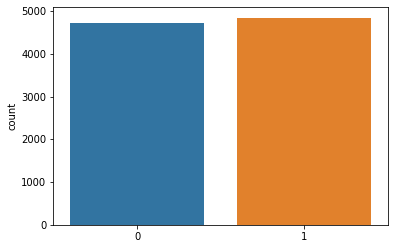

In [ ]:
sns.countplot(y)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

Accuracy Score :  0.9498117942283564 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1143
           1       0.95      0.95      0.95      1248

    accuracy                           0.95      2391
   macro avg       0.95      0.95      0.95      2391
weighted avg       0.95      0.95      0.95      2391
 



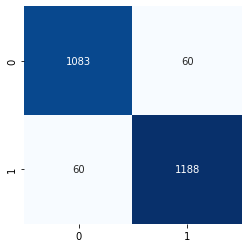

In [ ]:
def displayConfusionMatrix(classifier, X_t, y_t):
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_t)
    cm = confusion_matrix(y_t, y_pred)
    print("Accuracy Score : ",accuracy_score(y_t, y_pred), "\n")
    print(classification_report(y_t, y_pred), "\n")
    sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

displayConfusionMatrix(lr, X_test, y_test)

In [ ]:
def verifyModel(model, df):
    
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_absolute_error 

    kf = KFold(n_splits=10)
    mae_train = []
    mae_test = []
    kFoldClassifiers = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = df.iloc[: ,:-1].iloc[train_index], df.iloc[: ,:-1].iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train , y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))

    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

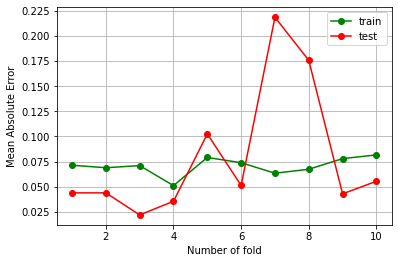

In [ ]:
model = LogisticRegression()
verifyModel(model, df)